In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

plt.rcParams["figure.figsize"] = (30,30)
plt.rcParams["font.size"] = 24

## Quy chuẩn dữ liệu

__Game__: Empire Warriors <br>
__Platform__: IOS<br>
__Country__: United States<br>
__Date Range__: 2018-11-05 -> 2019-10-31<br>

### 1. Có Organic Uplift với TDi ở US không?
### 2. Nếu có thì con số k-factor (= organic uplift/paid install) dao động như nào?
### 3. Có dự đoán được organic uplift trong tương lai hay ko? 

Nếu định nghĩa __Organic Uplift__ là phần __Organic install__ tăng lên do có sự tác động của Paid install so với lượng __Base Organic install__ (phần install không bị ảnh hưởng bời Paid install) <br>
=> Có thể tính __Base Organic install__ từ các biến khác và từ đó tính ra Organic install

#### Mô tả cách tính Base Organic Install

Sử dụng số liệu organic install của top 20 nước có nhiều install nhất trong khoảng thời gian có ít lượng paid install ở US.

__Top 20 Nước :__ BR, CA, FR, PH, RU, TH, TW, UK, VN, AU, DE, ES, ID, IT, JP, KR, MX, MY, NL, TR, UA<br>
__Thời gian :__ Từ 05/11/2018 đến 15/05/2019

In [2]:
df = pd.read_excel('organic_by_country.xlsx')
df['Row Labels'] = pd.to_datetime(df['Row Labels'])
df.set_index('Row Labels', inplace=True)

### I. Chọn những quốc gia có chỉ số install tương quan với install của US đồng thời không tương quan lẫn nhau

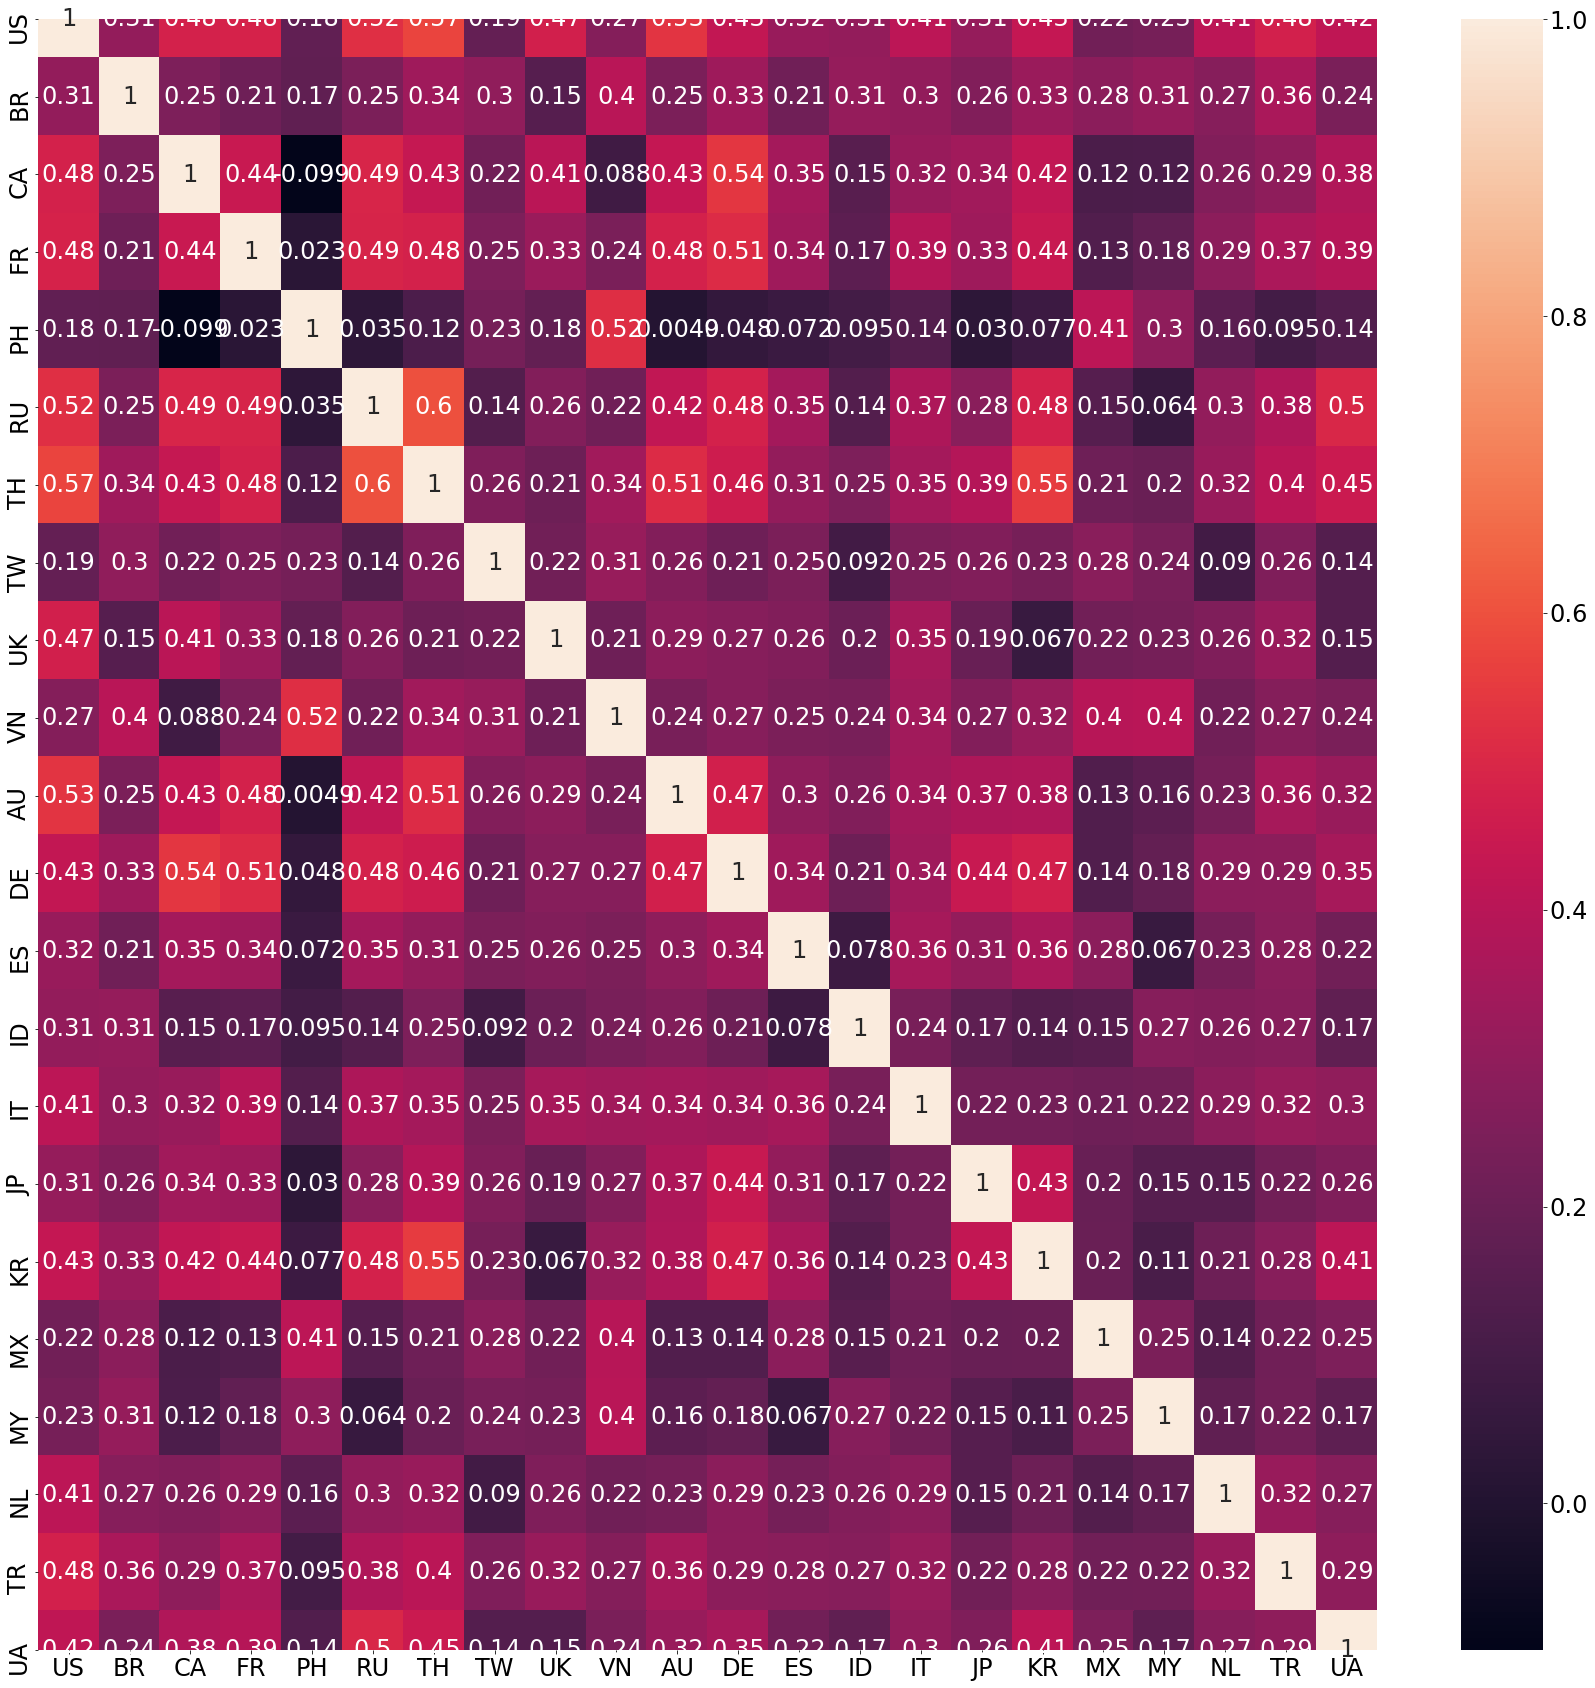

In [22]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True) 

In [14]:
X = df.drop(['US', 'TH', 'PH', 'TW', 'DE'], axis=1).fillna(0)
y = df.US.fillna(0)

In [15]:
X_use = X.iloc[:193, :]
X_to_pred = X.iloc[193:, :]

y_use = y.iloc[:193]
y_to_pred = y.iloc[193:]

In [ ]:
X_train = X_use.iloc[:144, :]
X_test = X_use.iloc[134:, :]

y_train = y_use.iloc[:144]
y_test = y_use.iloc[134:]

### II. Xây dựng model dự đoán install

In [17]:
import tensorflow.keras as keras

In [18]:
model = keras.Sequential()
model.add(keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), input_dim=X_train.shape[1]))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1, activation='linear', kernel_regularizer=keras.regularizers.l2(0.01)))

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error']
)

hist = model.fit(X_train, y_train, batch_size=64, epochs=300, validation_data=(X_test, y_test))

W0130 14:06:13.703657  7892 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 144 samples, validate on 59 samples
Epoch 1/300
144/144 [==============================] - 1s 7ms/sample - loss: 61.8827 - mean_absolute_error: 60.7983 - val_loss: 76.3769 - val_mean_absolute_error: 75.2989
Epoch 2/300
144/144 [==============================] - 0s 122us/sample - loss: 58.0187 - mean_absolute_error: 56.9424 - val_loss: 71.7049 - val_mean_absolute_error: 70.6338
Epoch 3/300
144/144 [==============================] - 0s 122us/sample - loss: 52.3469 - mean_absolute_error: 51.2771 - val_loss: 67.3922 - val_mean_absolute_error: 66.3268
Epoch 4/300
144/144 [==============================] - 0s 129us/sample - loss: 46.1498 - mean_absolute_error: 45.0857 - val_loss: 63.0816 - val_mean_absolute_error: 62.0213
Epoch 5/300
144/144 [==============================] - 0s 108us/sample - loss: 41.2038 - mean_absolute_error: 40.1445 - val_loss: 58.7116 - val_mean_absolute_error: 57.6558
Epoch 6/300
144/144 [==============================] - 0s 115us/sample - loss: 38.2102 - mea

Epoch 48/300
144/144 [==============================] - 0s 92us/sample - loss: 22.7202 - mean_absolute_error: 21.7792 - val_loss: 19.8511 - val_mean_absolute_error: 18.9112
Epoch 49/300
144/144 [==============================] - 0s 95us/sample - loss: 23.0079 - mean_absolute_error: 22.0684 - val_loss: 20.7552 - val_mean_absolute_error: 19.8172
Epoch 50/300
144/144 [==============================] - 0s 95us/sample - loss: 22.4706 - mean_absolute_error: 21.5330 - val_loss: 21.2965 - val_mean_absolute_error: 20.3603
Epoch 51/300
144/144 [==============================] - 0s 102us/sample - loss: 23.3939 - mean_absolute_error: 22.4581 - val_loss: 21.7491 - val_mean_absolute_error: 20.8147
Epoch 52/300
144/144 [==============================] - 0s 115us/sample - loss: 22.3502 - mean_absolute_error: 21.4162 - val_loss: 22.1623 - val_mean_absolute_error: 21.2299
Epoch 53/300
144/144 [==============================] - 0s 95us/sample - loss: 21.6826 - mean_absolute_error: 20.7507 - val_loss: 23.

144/144 [==============================] - 0s 98us/sample - loss: 16.6567 - mean_absolute_error: 15.7889 - val_loss: 18.3299 - val_mean_absolute_error: 17.4630
Epoch 143/300
144/144 [==============================] - 0s 102us/sample - loss: 19.4652 - mean_absolute_error: 18.5987 - val_loss: 19.0705 - val_mean_absolute_error: 18.2050
Epoch 144/300
144/144 [==============================] - 0s 95us/sample - loss: 18.4425 - mean_absolute_error: 17.5775 - val_loss: 19.9653 - val_mean_absolute_error: 19.1012
Epoch 145/300
144/144 [==============================] - 0s 95us/sample - loss: 18.1900 - mean_absolute_error: 17.3261 - val_loss: 19.3832 - val_mean_absolute_error: 18.5195
Epoch 146/300
144/144 [==============================] - 0s 88us/sample - loss: 18.5546 - mean_absolute_error: 17.6909 - val_loss: 18.7655 - val_mean_absolute_error: 17.9020
Epoch 147/300
144/144 [==============================] - 0s 95us/sample - loss: 19.7870 - mean_absolute_error: 18.9236 - val_loss: 18.4293 - va

144/144 [==============================] - 0s 136us/sample - loss: 20.0567 - mean_absolute_error: 19.2193 - val_loss: 22.2229 - val_mean_absolute_error: 21.3855
Epoch 190/300
144/144 [==============================] - 0s 108us/sample - loss: 19.1010 - mean_absolute_error: 18.2635 - val_loss: 20.6711 - val_mean_absolute_error: 19.8331
Epoch 191/300
144/144 [==============================] - 0s 108us/sample - loss: 18.0809 - mean_absolute_error: 17.2428 - val_loss: 19.3589 - val_mean_absolute_error: 18.5204
Epoch 192/300
144/144 [==============================] - 0s 122us/sample - loss: 19.1797 - mean_absolute_error: 18.3409 - val_loss: 17.9774 - val_mean_absolute_error: 17.1380
Epoch 193/300
144/144 [==============================] - 0s 102us/sample - loss: 18.8922 - mean_absolute_error: 18.0528 - val_loss: 18.0994 - val_mean_absolute_error: 17.2603
Epoch 194/300
144/144 [==============================] - 0s 108us/sample - loss: 18.6013 - mean_absolute_error: 17.7624 - val_loss: 18.6691

Epoch 236/300
144/144 [==============================] - 0s 102us/sample - loss: 16.8968 - mean_absolute_error: 16.0779 - val_loss: 19.1921 - val_mean_absolute_error: 18.3736
Epoch 237/300
144/144 [==============================] - 0s 95us/sample - loss: 18.1420 - mean_absolute_error: 17.3236 - val_loss: 19.0140 - val_mean_absolute_error: 18.1959
Epoch 238/300
144/144 [==============================] - 0s 95us/sample - loss: 18.8316 - mean_absolute_error: 18.0137 - val_loss: 19.2941 - val_mean_absolute_error: 18.4768
Epoch 239/300
144/144 [==============================] - 0s 102us/sample - loss: 17.7560 - mean_absolute_error: 16.9388 - val_loss: 19.2912 - val_mean_absolute_error: 18.4745
Epoch 240/300
144/144 [==============================] - 0s 102us/sample - loss: 17.2546 - mean_absolute_error: 16.4380 - val_loss: 19.4910 - val_mean_absolute_error: 18.6751
Epoch 241/300
144/144 [==============================] - 0s 95us/sample - loss: 18.6669 - mean_absolute_error: 17.8511 - val_lo

Epoch 283/300
144/144 [==============================] - 0s 108us/sample - loss: 18.4932 - mean_absolute_error: 17.6913 - val_loss: 20.5931 - val_mean_absolute_error: 19.7922
Epoch 284/300
144/144 [==============================] - 0s 102us/sample - loss: 17.2835 - mean_absolute_error: 16.4826 - val_loss: 20.3451 - val_mean_absolute_error: 19.5444
Epoch 285/300
144/144 [==============================] - 0s 95us/sample - loss: 17.6267 - mean_absolute_error: 16.8261 - val_loss: 19.9318 - val_mean_absolute_error: 19.1312
Epoch 286/300
144/144 [==============================] - 0s 95us/sample - loss: 17.6358 - mean_absolute_error: 16.8350 - val_loss: 18.9012 - val_mean_absolute_error: 18.0997
Epoch 287/300
144/144 [==============================] - 0s 102us/sample - loss: 18.0799 - mean_absolute_error: 17.2784 - val_loss: 18.0967 - val_mean_absolute_error: 17.2946
Epoch 288/300
144/144 [==============================] - 0s 95us/sample - loss: 17.0831 - mean_absolute_error: 16.2808 - val_lo

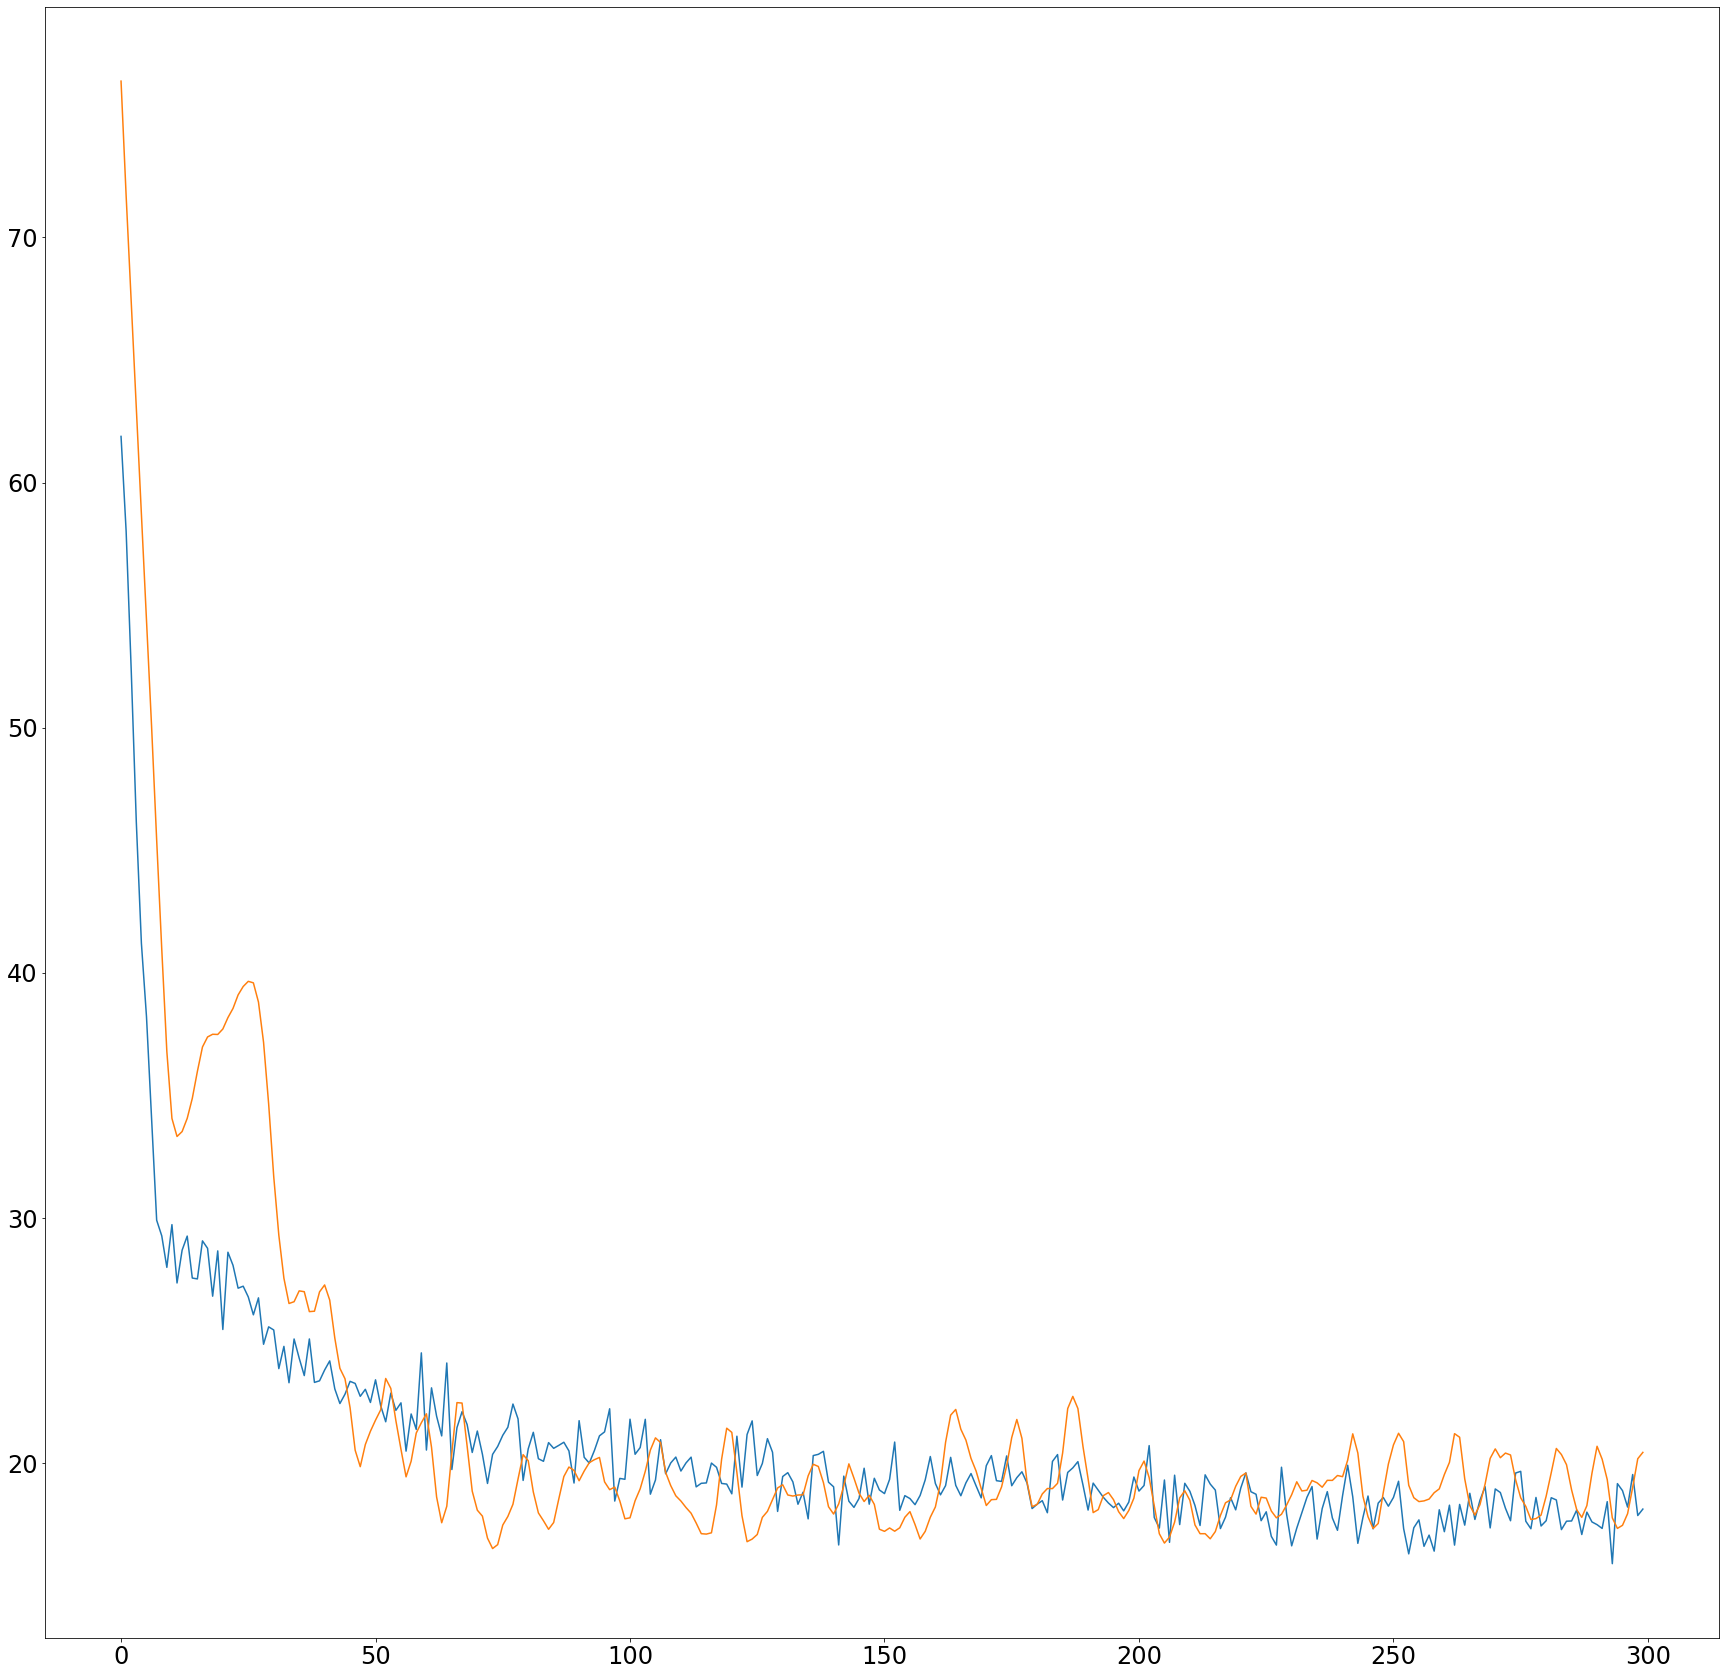

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

W0130 14:08:16.102009  7892 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


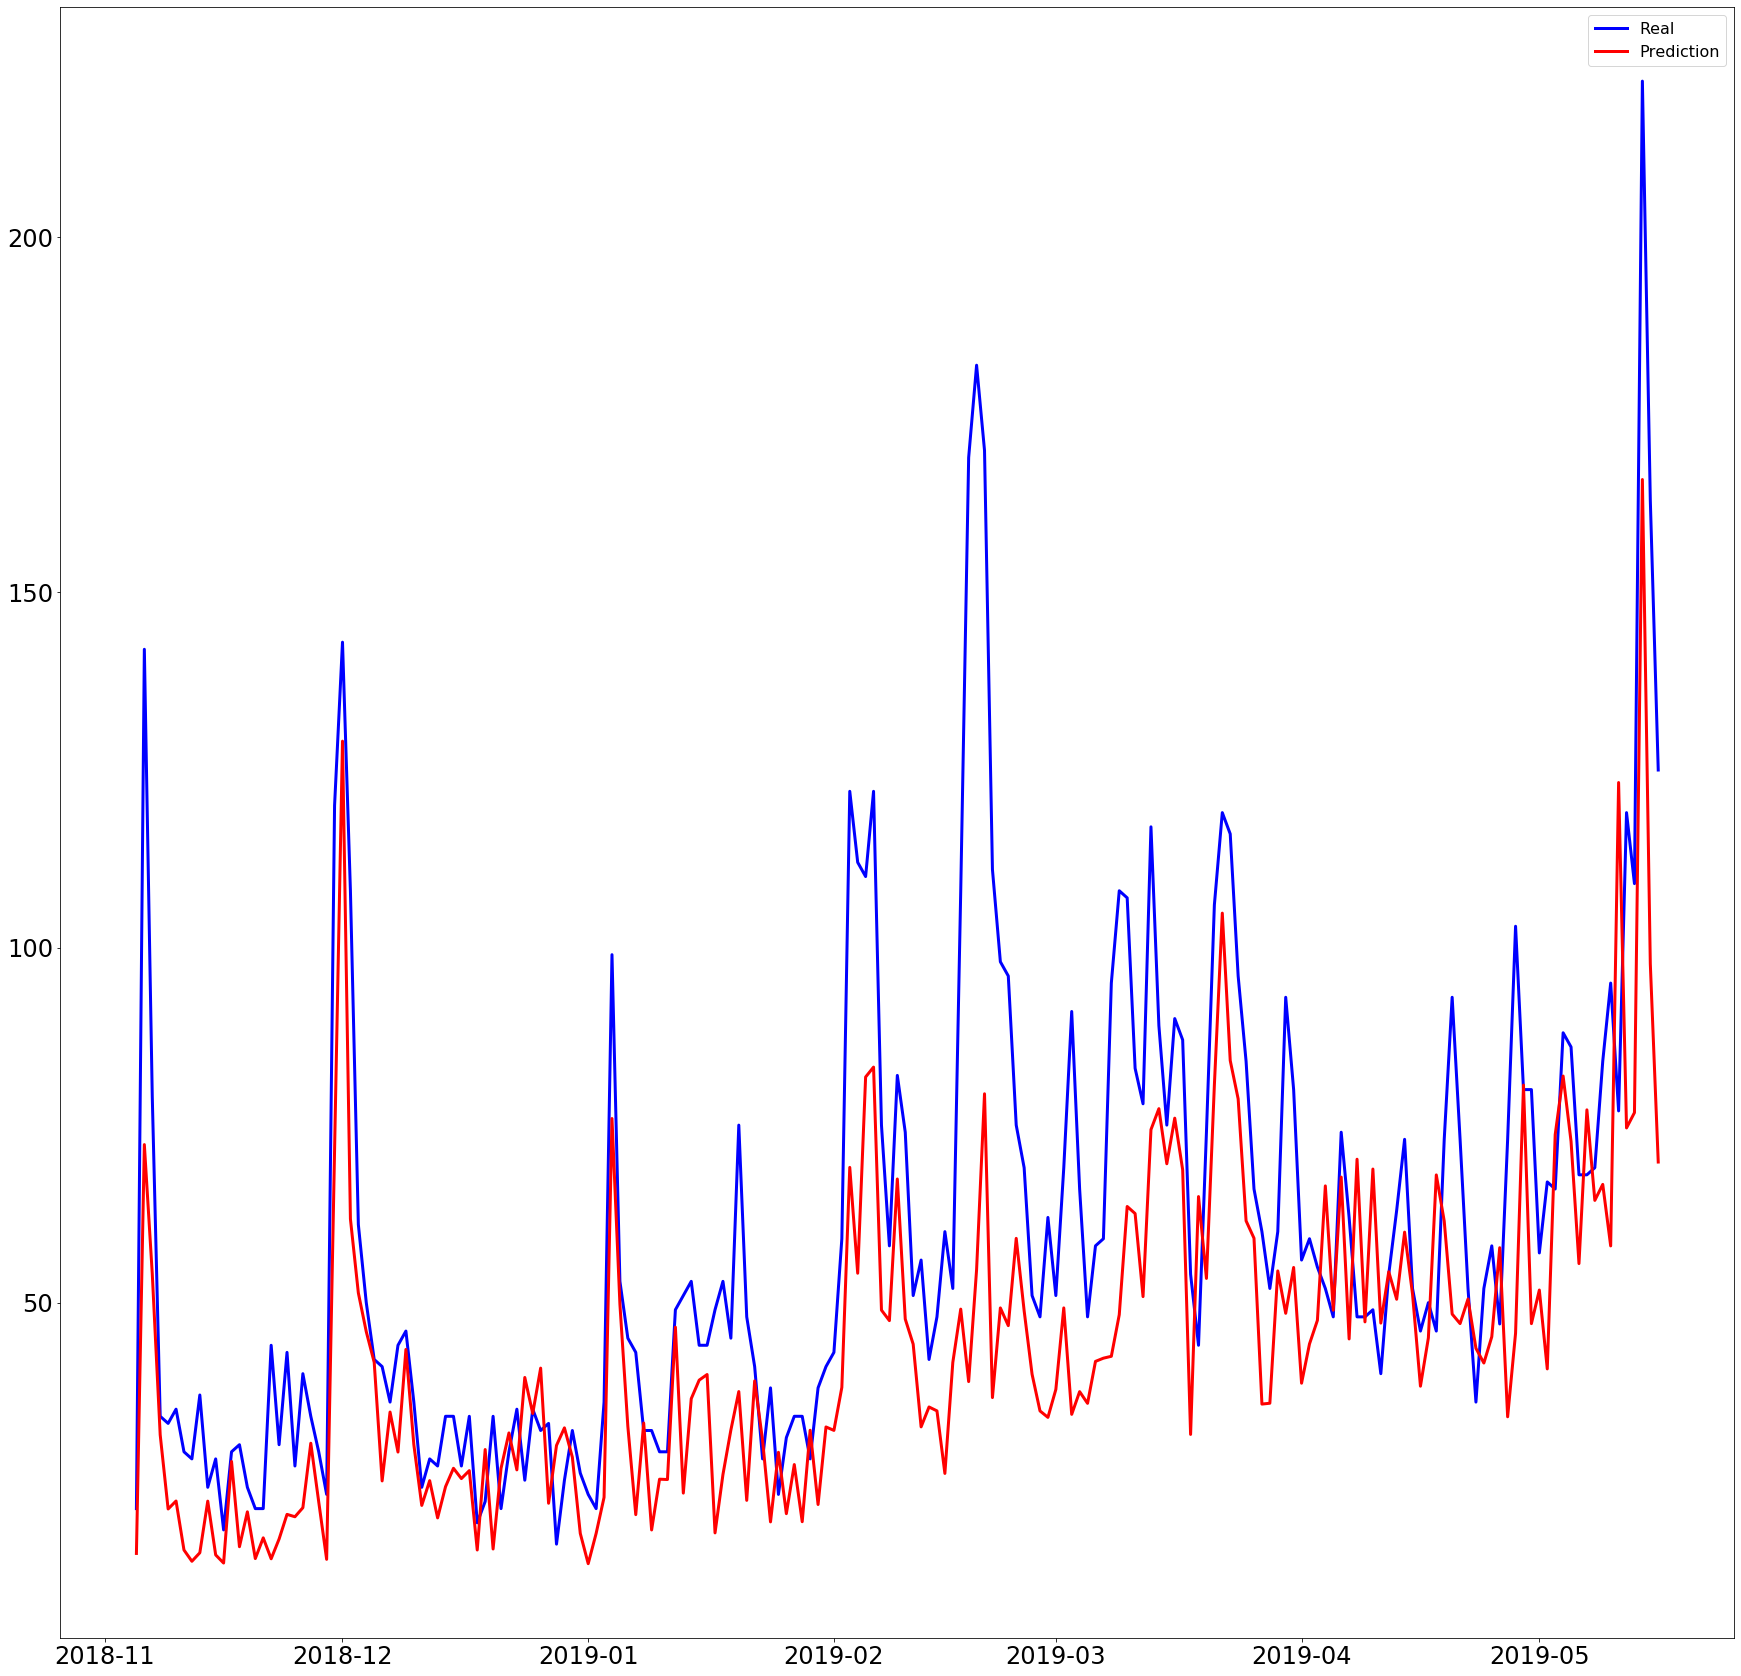

In [24]:
y_pred = model.predict(X_use)
y_pred = pd.DataFrame(y_pred).set_index(y_use.index)

plt.plot(y_use, color='blue', linewidth=3, label='Real')
plt.plot(y_pred, color='red', linewidth=3, label='Prediction')

plt.legend(loc='best', fontsize=16)

W0130 14:08:29.125659  7892 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


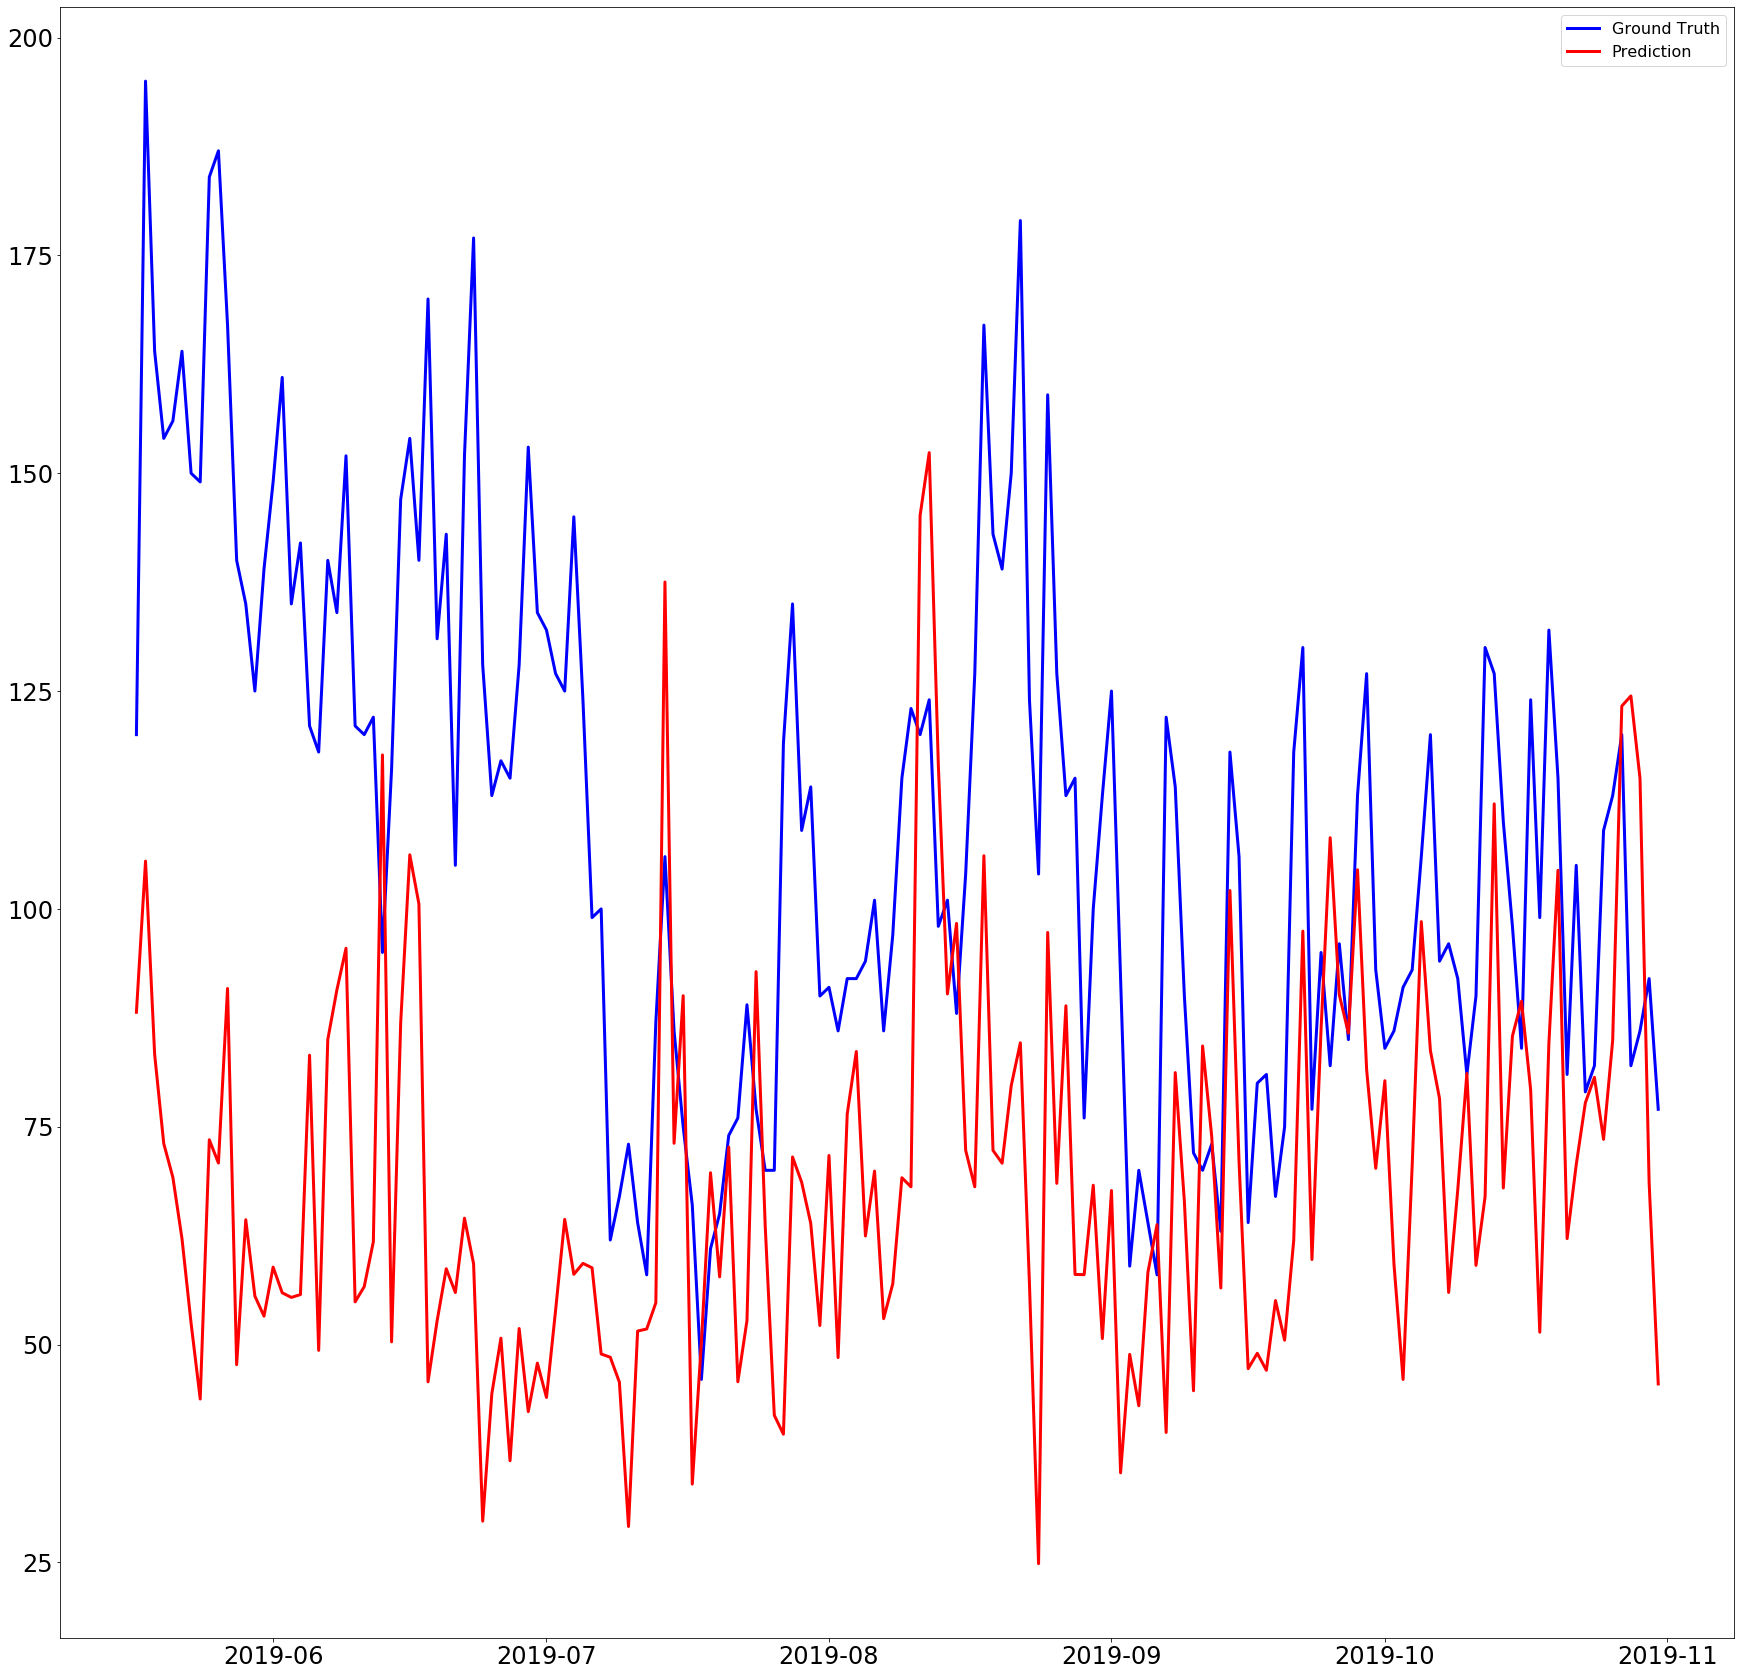

In [25]:
y_pred = model.predict(X_to_pred)
y_pred = pd.DataFrame(y_pred).set_index(y_to_pred.index)

plt.plot(y_to_pred, color='blue', linewidth=3, label='Ground Truth')
plt.plot(y_pred, color='red', linewidth=3, label='Prediction')
plt.legend(loc='best', fontsize=16)

### III. Xây dựng model dự đoán từ lượng install của những quốc gia đuợc đầu tư tương đương US

In [26]:
A = df[['UA', 'TR', 'NL', 'KR', 'IT', 'AU', 'UK', 'TH', 'FR', 'CA']]
b = df.US

A_use = A.iloc[:193, :]
A_to_pred = A.iloc[193:, :]

b_use = b.iloc[:193]
b_to_pred =b.iloc[193:]

A_train = A_use.iloc[:144, :]
A_test = A_use.iloc[134:, :]

b_train = b_use.iloc[:144]
b_test = b_use.iloc[134:]

In [27]:
model_2 = keras.Sequential()
model_2.add(keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.015), input_dim=A_train.shape[1]))
model_2.add(keras.layers.Dropout(0.35))
model_2.add(keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.015)))
model_2.add(keras.layers.Dropout(0.35))
model_2.add(keras.layers.Dense(1, activation='linear', kernel_regularizer=keras.regularizers.l2(0.015)))

model_2.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error']
)

hist = model_2.fit(A_train, b_train, batch_size=64, epochs=300, validation_data=(A_test, b_test))

W0130 14:08:38.861891  7892 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 144 samples, validate on 59 samples
Epoch 1/300
144/144 [==============================] - 0s 1ms/sample - loss: 59.4952 - mean_absolute_error: 58.7673 - val_loss: 77.1322 - val_mean_absolute_error: 76.4099
Epoch 2/300
144/144 [==============================] - 0s 122us/sample - loss: 58.9786 - mean_absolute_error: 58.2577 - val_loss: 76.3768 - val_mean_absolute_error: 75.6608
Epoch 3/300
144/144 [==============================] - 0s 129us/sample - loss: 57.8420 - mean_absolute_error: 57.1273 - val_loss: 75.6807 - val_mean_absolute_error: 74.9707
Epoch 4/300
144/144 [==============================] - 0s 108us/sample - loss: 57.3726 - mean_absolute_error: 56.6638 - val_loss: 75.0126 - val_mean_absolute_error: 74.3080
Epoch 5/300
144/144 [==============================] - 0s 108us/sample - loss: 56.8692 - mean_absolute_error: 56.1659 - val_loss: 74.3511 - val_mean_absolute_error: 73.6517
Epoch 6/300
144/144 [==============================] - 0s 129us/sample - loss: 56.4496 - mea

Epoch 48/300
144/144 [==============================] - 0s 95us/sample - loss: 20.9765 - mean_absolute_error: 20.3591 - val_loss: 16.7138 - val_mean_absolute_error: 16.0980
Epoch 49/300
144/144 [==============================] - 0s 88us/sample - loss: 20.5605 - mean_absolute_error: 19.9452 - val_loss: 16.6969 - val_mean_absolute_error: 16.0834
Epoch 50/300
144/144 [==============================] - 0s 95us/sample - loss: 20.5340 - mean_absolute_error: 19.9210 - val_loss: 16.7549 - val_mean_absolute_error: 16.1438
Epoch 51/300
144/144 [==============================] - 0s 95us/sample - loss: 19.1665 - mean_absolute_error: 18.5559 - val_loss: 16.5885 - val_mean_absolute_error: 15.9793
Epoch 52/300
144/144 [==============================] - 0s 95us/sample - loss: 20.0066 - mean_absolute_error: 19.3976 - val_loss: 16.2263 - val_mean_absolute_error: 15.6185
Epoch 53/300
144/144 [==============================] - 0s 88us/sample - loss: 20.9016 - mean_absolute_error: 20.2942 - val_loss: 16.17

144/144 [==============================] - 0s 102us/sample - loss: 19.1638 - mean_absolute_error: 18.6596 - val_loss: 16.6797 - val_mean_absolute_error: 16.1749
Epoch 143/300
144/144 [==============================] - 0s 95us/sample - loss: 19.1219 - mean_absolute_error: 18.6170 - val_loss: 16.2020 - val_mean_absolute_error: 15.6969
Epoch 144/300
144/144 [==============================] - 0s 88us/sample - loss: 20.0542 - mean_absolute_error: 19.5490 - val_loss: 16.1669 - val_mean_absolute_error: 15.6622
Epoch 145/300
144/144 [==============================] - 0s 95us/sample - loss: 19.3648 - mean_absolute_error: 18.8604 - val_loss: 16.5145 - val_mean_absolute_error: 16.0112
Epoch 146/300
144/144 [==============================] - 0s 95us/sample - loss: 18.2249 - mean_absolute_error: 17.7220 - val_loss: 16.8785 - val_mean_absolute_error: 16.3766
Epoch 147/300
144/144 [==============================] - 0s 88us/sample - loss: 18.6261 - mean_absolute_error: 18.1245 - val_loss: 16.9224 - va

Epoch 236/300
144/144 [==============================] - 0s 88us/sample - loss: 18.5063 - mean_absolute_error: 18.0513 - val_loss: 15.1849 - val_mean_absolute_error: 14.7299
Epoch 237/300
144/144 [==============================] - 0s 88us/sample - loss: 18.6259 - mean_absolute_error: 18.1709 - val_loss: 15.2318 - val_mean_absolute_error: 14.7772
Epoch 238/300
144/144 [==============================] - 0s 81us/sample - loss: 17.8748 - mean_absolute_error: 17.4206 - val_loss: 15.3692 - val_mean_absolute_error: 14.9161
Epoch 239/300
144/144 [==============================] - 0s 81us/sample - loss: 19.1239 - mean_absolute_error: 18.6712 - val_loss: 15.5611 - val_mean_absolute_error: 15.1095
Epoch 240/300
144/144 [==============================] - 0s 88us/sample - loss: 17.7429 - mean_absolute_error: 17.2915 - val_loss: 15.6804 - val_mean_absolute_error: 15.2296
Epoch 241/300
144/144 [==============================] - 0s 81us/sample - loss: 18.4175 - mean_absolute_error: 17.9670 - val_loss:

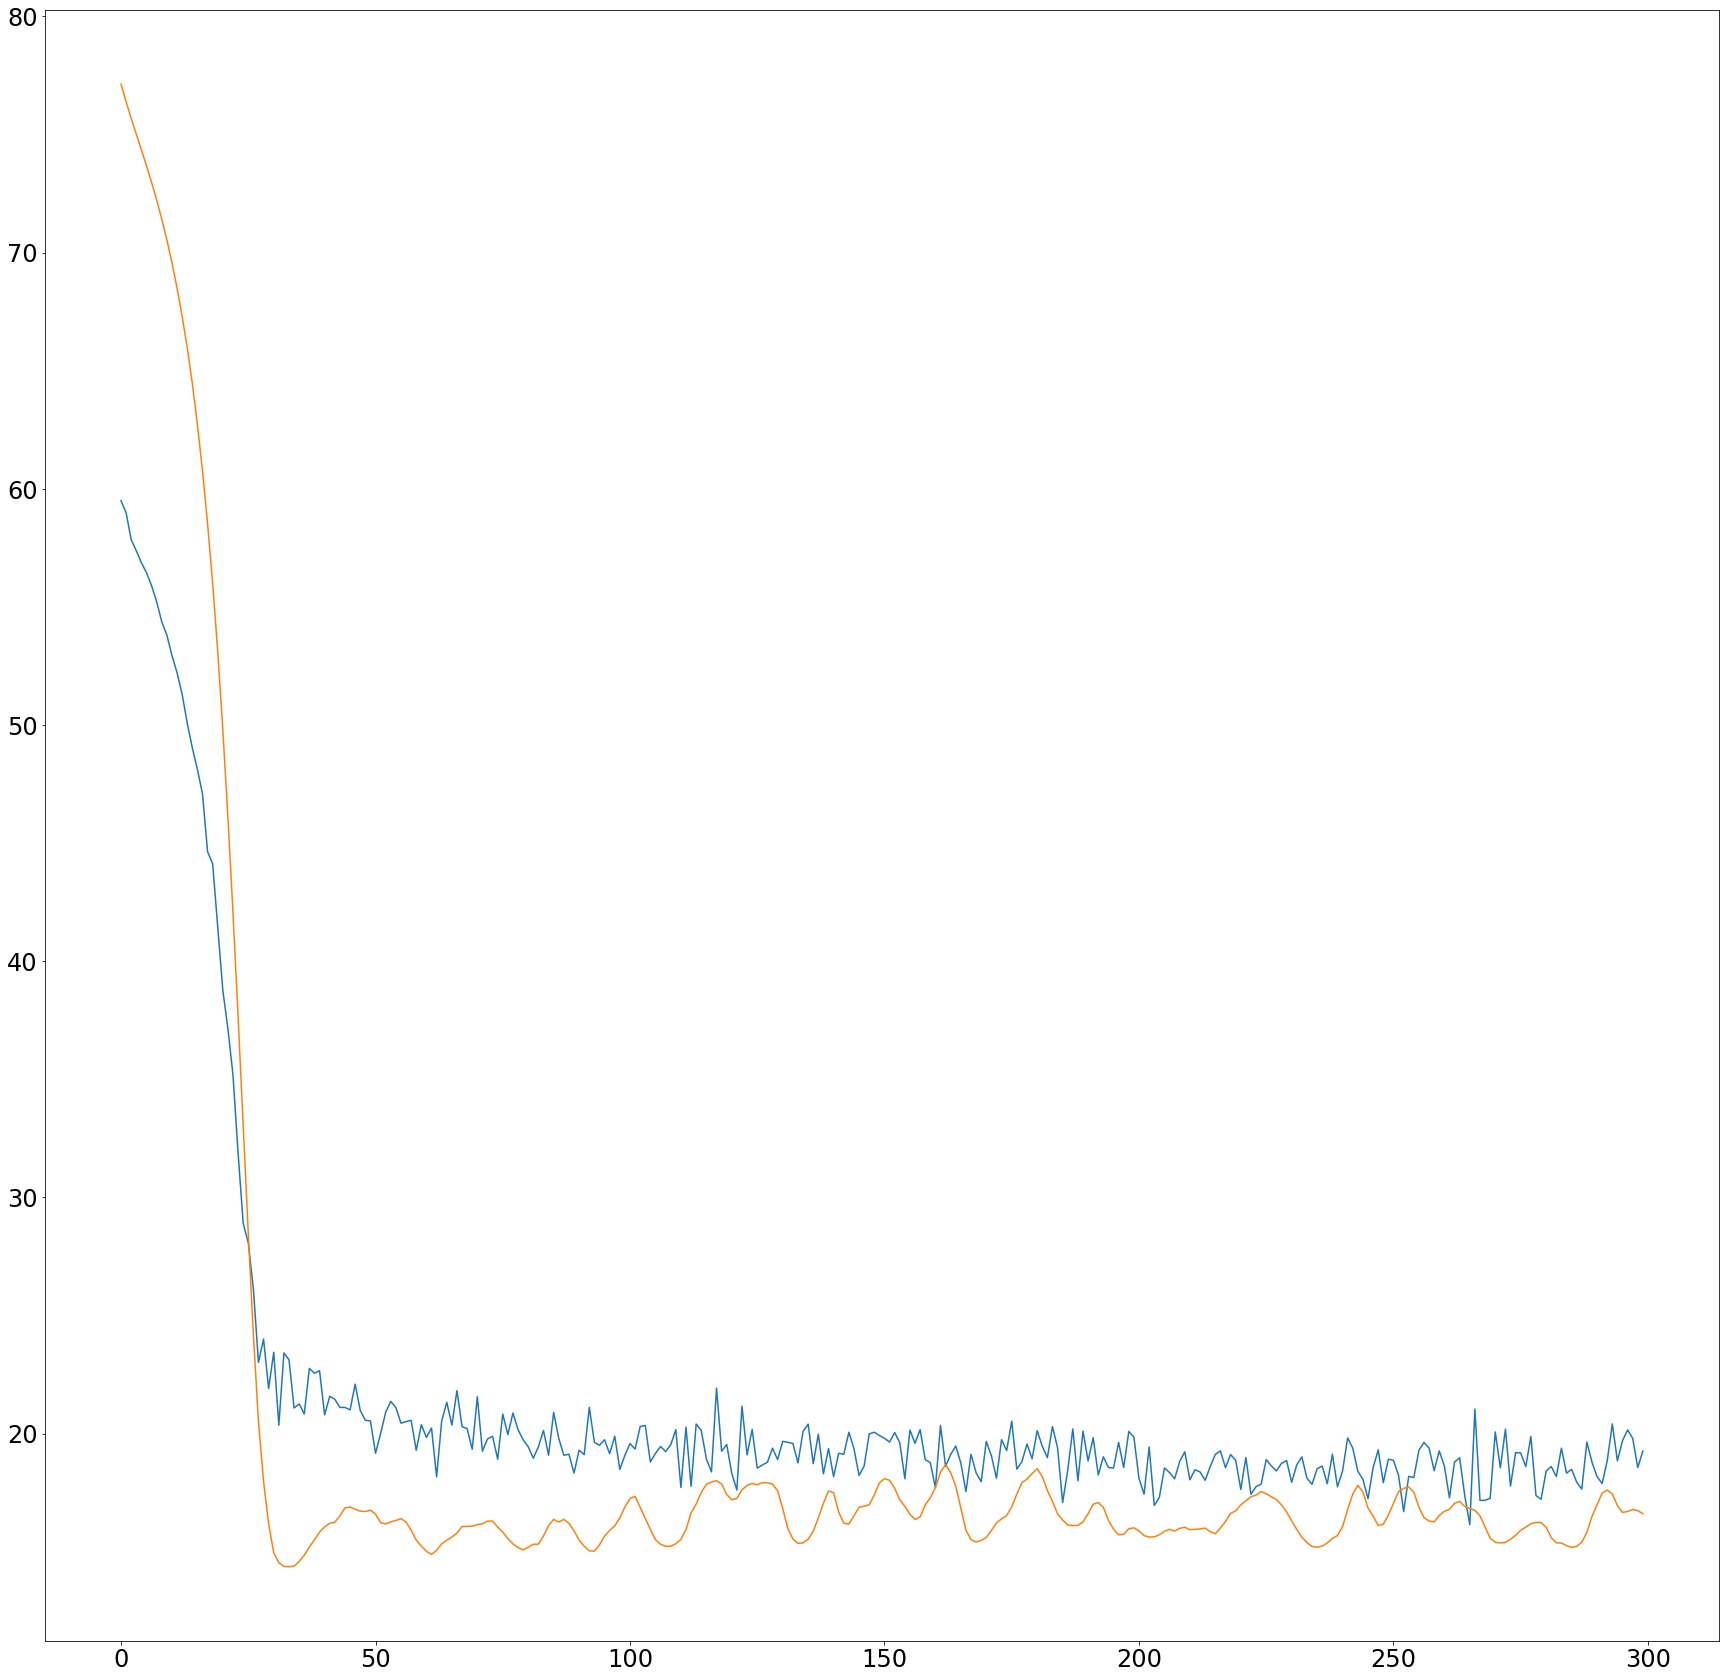

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

W0130 14:10:01.510473  7892 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


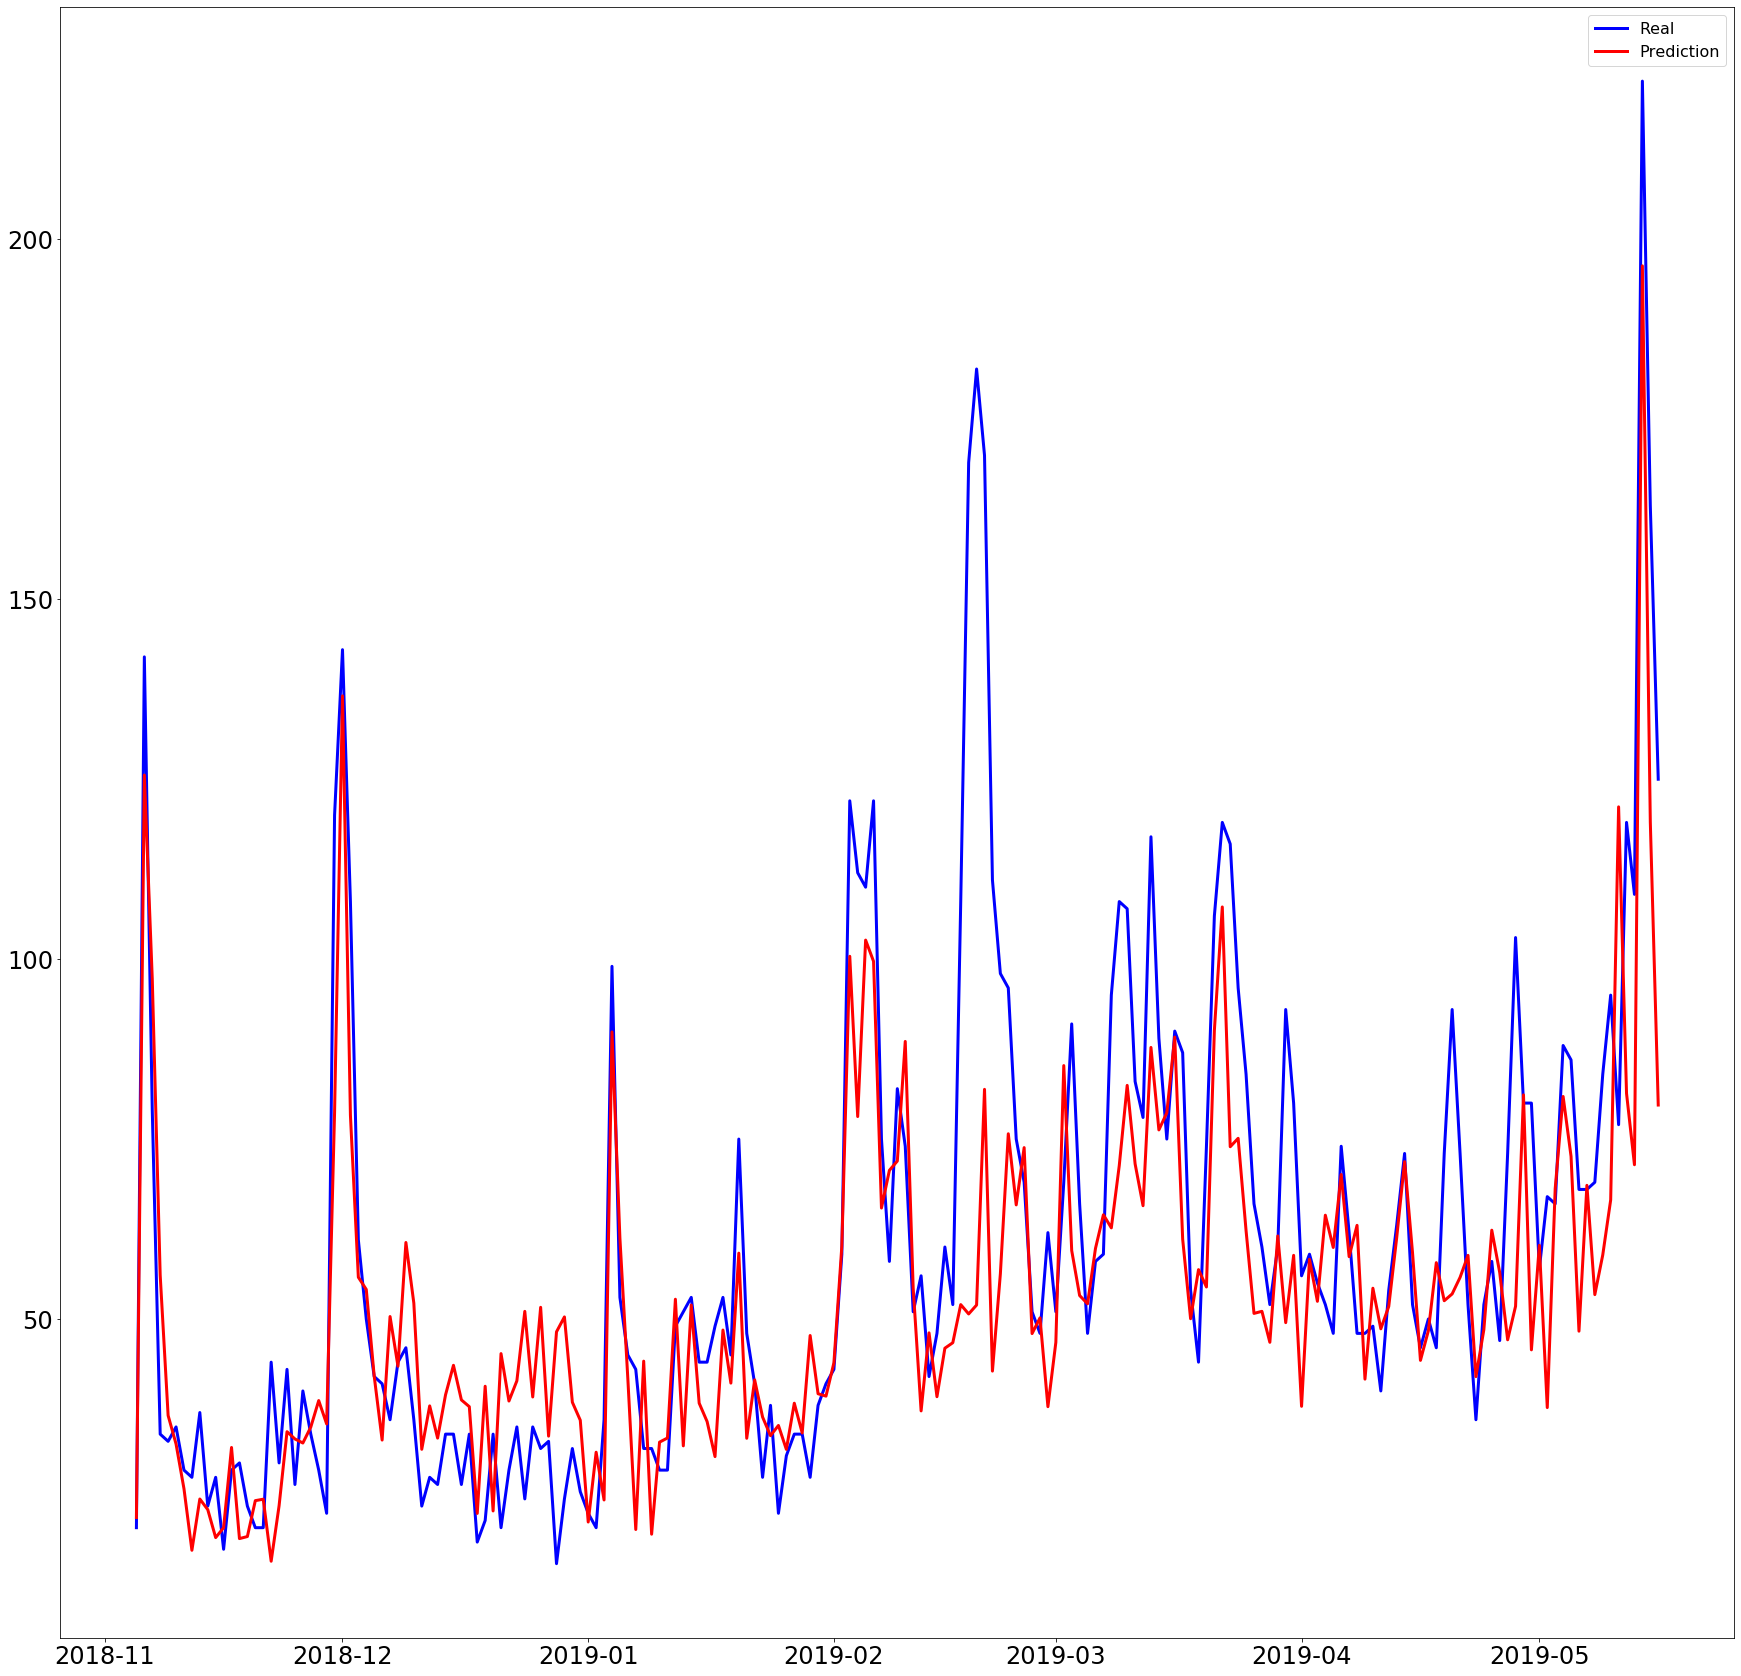

In [29]:
b_pred = model_2.predict(A_use)
b_pred = pd.DataFrame(b_pred).set_index(b_use.index)

plt.plot(b_use, color='blue', linewidth=3, label='Real')
plt.plot(b_pred, color='red', linewidth=3, label='Prediction')

plt.legend(loc='best', fontsize=16)

W0130 14:10:06.325294  7892 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


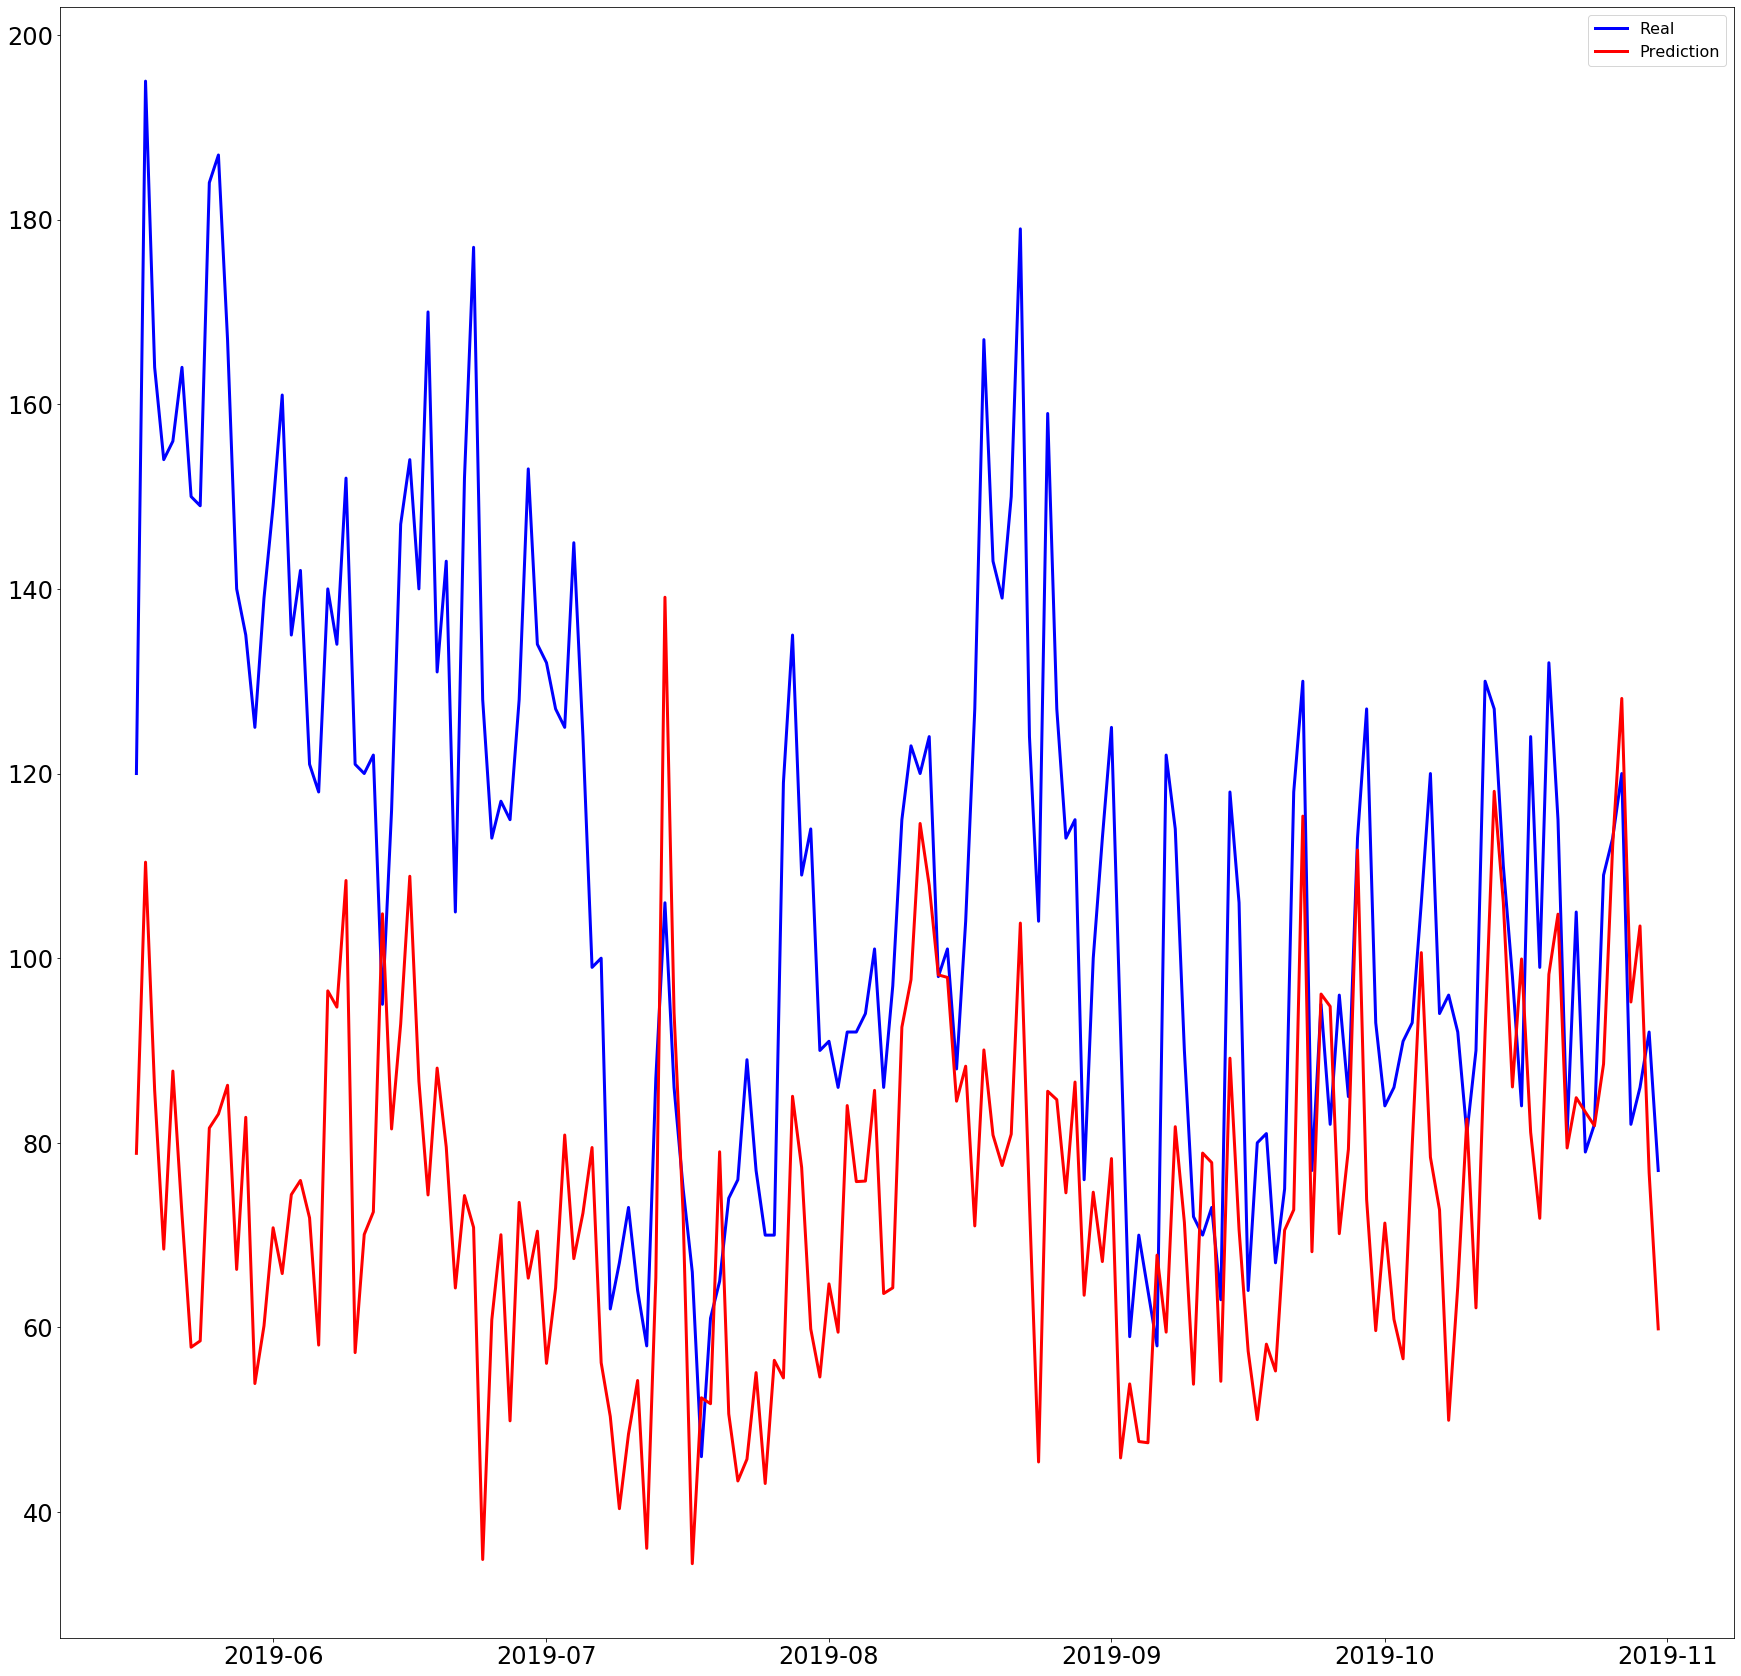

In [30]:
b_pred = model_2.predict(A_to_pred)
b_pred = pd.DataFrame(b_pred).set_index(b_to_pred.index)

plt.plot(b_to_pred, color='blue', linewidth=3, label='Real')
plt.plot(b_pred, color='red', linewidth=3, label='Prediction')

plt.legend(loc='best', fontsize=16)

In [18]:
print(b_pred)

                     0
Row Labels            
2019-05-17   82.653496
2019-05-18  113.283737
2019-05-19   91.115089
2019-05-20   70.206512
2019-05-21   89.549103
...                ...
2019-10-27  129.002914
2019-10-28   96.992149
2019-10-29  105.054688
2019-10-30   78.808556
2019-10-31   59.203728

[168 rows x 1 columns]


In [24]:
export_csv = b_use.to_csv(r'C:\Users\Asus\Documents\Python\time series\organic_uplift\4.csv', header=True)